# Описание проекта:

Для того, чтобы  предлагать покупателям дополнительные товары из той же категории и оптимизировать закупку дополнительных товаров рассмотрим датасет, который описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

# Цель:

Определить какие товар входят в основной и в дополнительный ассортимент.


# План проекта:

 1. Подготовить полученные данные:
    * Исследовать пропущенные значения;
    * Исследовать соответствие типов;
    * Исследовать дубликаты;
    * Привести к корректной дате.
    
    
 2. Провести исследовательский анализ данных:
    * Построить гистограммы, ящики с усами;
    * Найти выбросы;
    * Создать новый столбец с категориями;
    * Разделить в категориях товары на основные и дополнительные;
    * Исследовать продажы товаров по неделяям и месяцам.
 
   
 3. Проверить гипотезы
 
   
 4. Написать общий вывод о проведённом анализе
 
# Материалы для Я.Практикума:
 
 Презентация [https://disk.yandex.ru/i/po9AxKNuyoplYQ]
 
 Дашборд [https://public.tableau.com/app/profile/kirill2701/viz/DashbordShop/sheet3]
 

# Оглавление
# 1.[Шаг 1. Загрузим данные](#1) 
# 2.[Шаг 2. Предобработка данных](#2) 
# 3.[Шаг 3. Исследовательский анализ данных (EDA)](#3)
# 4.[Шаг 4. Проверим гипотезы](#4)
# 5.[Выводы](#5)

# Шаг 1. Загрузим данные<a id="1"></a>

In [1]:
# загрузим наши данные:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/datasets/ecommerce_dataset.csv')

In [2]:
# Выведем часть DF:
data.sample(n=10,random_state=1)

,date,customer_id,order_id,product,quantity,price
6338,2019091614,545f2b2b-795c-4162-956c-34909dca09b1,72652,Терка для сыра Comfortline из нержавеющей стал...,1,1274.0
2255,2019030909,1a32c1a4-5862-4896-8671-fa4c1ffcf0c4,70666,"Сумка-тележка TWIN стальной каркас 56 л серая,...",1,2549.0
1470,2019011013,4dde5428-a8c3-4547-a828-427734519307,69767,Набор вешалок деревянных 3 шт с перекладиной 4...,3,352.0
3229,2019042716,d3b9ffea-d143-4747-8d59-74ab843d1ad6,14698,томата (помидор) Пурпурная страсть № 101 сорт ...,1,38.0
1768,2019021012,bd74b48f-17ea-45f7-8c66-510665aad57f,70187,Искусственный цветок Ландыш пластиковый малый ...,12,20.0
4337,2019060219,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт НЛО Белый, кассета по 6шт",1,120.0
2645,2019040410,eeec96e6-88f0-4d11-a100-0b3971840412,14614,"Бакопа ампельная мега-крупная белая объем 0,5 л",1,82.0
3354,2019050216,760aa067-90c3-4794-b7a9-a8831197388b,14715,Декабрист в горшке D12 белый с розовой каймой,1,139.0
1548,2019011910,4d416cec-6f5b-4444-9b50-08770397714b,14521,Пеларгония зональная диам. 12 см красная махровая,1,188.0
2922,2019041622,d4f984b6-ea59-4618-a26f-79a053e483c7,14653,томата (помидор) Ильди №35 сорт детерминантный...,1,38.0


**Вывод:** загрузили данные и вывели случайные 10 строк из датасета

# Шаг 2. Предобработка данных<a id="2"></a>

In [3]:
# посмотрим краткую информацию о типах данных, столбцах и их содеражнии:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


In [4]:
# Проверим на наличие полных дубликатов:
data.duplicated().sum()

0

In [5]:
# Проверим на наличие пропущенных значений:
data.isnull().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

In [6]:
# приведем все значения к нижнему регистру:
data['product']= data['product'].str.lower()

In [7]:
# Поменяем тип даты на специальный:
data['date'] = pd.to_datetime(data['date'], format = '%Y%m%d%H').dt.floor('1D')

In [8]:
# Добавим столбцы с днем недели, месяцем и годом:
data['day_of_week'] = data['date'].values.astype('datetime64[W]')
data['month_year'] = data['date'].values.astype('datetime64[M]')
data['year'] = data['date'].dt.year
data['week'] = data['date'].dt.week

In [9]:
display(data)

,date,customer_id,order_id,product,quantity,price,day_of_week,month_year,year,week
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-09-27,2018-10-01,2018,40
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018-09-27,2018-10-01,2018,40
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-09-27,2018-10-01,2018,40
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-09-27,2018-10-01,2018,40
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-09-27,2018-10-01,2018,40
...,...,...,...,...,...,...,...,...,...,...
6732,2019-10-31,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"таз пластмассовый 40,0 л пищевой овальный (иж)...",1,404.0,2019-10-31,2019-10-01,2019,44
6733,2019-10-31,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,2019-10-31,2019-10-01,2019,44
6734,2019-10-31,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,герань домашняя (пеларгония зональная) цветуща...,1,157.0,2019-10-31,2019-10-01,2019,44
6735,2019-10-31,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"таз пластмассовый со стиральной доской (иж), 1...",1,397.0,2019-10-31,2019-10-01,2019,44


**Выводы:**
* Полных дубликатов нет;
* Пропущенных значений нет;
* Заменили тип даты;
* Привели к нижнему регистру значения столбца **product**;
* В столбце **quantity** есть выбросы 1000, при медиане равной 1;
* В столбце **price** есть выбросы 14917, при медиане 135.

В целом очень хорошие данные.

# Шаг 3. Исследовательский анализ данных (EDA)<a id="3"></a>

In [10]:
# Узнаем сколько уникальных покупателей в месяц,неделю и день:
mau_total = data.groupby('month_year').agg({'customer_id': 'nunique'}).mean()
dau_total = data.groupby('date').agg({'customer_id':'nunique'}).mean()
wau_total = data.groupby('week').agg({'customer_id':'nunique'}).mean()
print('Количество уникальных пользователей в месяц (MAU) - {}'.format(int(mau_total)))
print('Количество уникальных пользователей в неделю (WAU) - {}'.format(int(wau_total)))
print('Количество уникальных пользователей в день (DAU) - {}'.format(int(dau_total)))

Количество уникальных пользователей в месяц (MAU) - 194
Количество уникальных пользователей в неделю (WAU) - 51
Количество уникальных пользователей в день (DAU) - 7


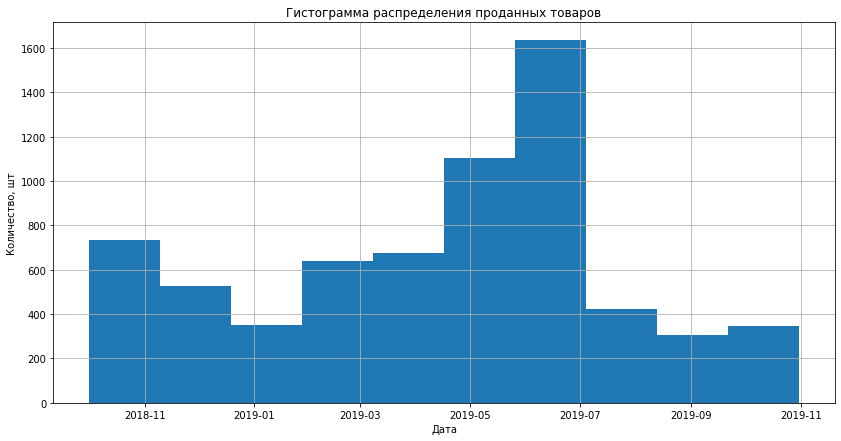

In [11]:
# Построим гистограмму для столбца'date' по распределению проданных товаров:
data['date'].hist(figsize=(14, 7), grid=True)
plt.title('Гистограмма распределения проданных товаров')
plt.xlabel('Дата')
plt.ylabel('Количество, шт')
plt.show()

**Выводы:**
* С марта 2019 по июль 2019 резкий рост продаж, пик в июне 2019г (более 1600 продаж);
* В сентябре 2019  минимум продаж (около 300);
* В Ноябре 2019 (около 350) явный спад продаж по сравнению с ноябрем 2018г. (около 750).

In [12]:
# Создадим новый DF по каждому пользователю с информацией о каждом заказе (стоимость и кол-во елементов в заказе):
users_data = data.groupby(['customer_id','order_id']).agg({'price':'sum','quantity':'sum'}).reset_index()
display(users_data)
users_data[['price','quantity']].describe()

,customer_id,order_id,price,quantity
0,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,555.0,4
1,001cee7f-0b29-4716-b202-0042213ab038,70290,442.0,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,72965,457.0,2
3,002d4d3a-4a59-406b-86ec-c3314357e498,69990,1649.0,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,72796,1162.0,2
...,...,...,...,...
2812,ff601403-b094-4b86-9ac6-264d725b9277,72313,1649.0,1
2813,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,1191.0,3
2814,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,69369,778.0,2
2815,ffb80538-3fda-4351-8ea9-9d2bec58bb07,72561,974.0,1


,price,quantity
count,2817.000000,2817.000000
mean,1104.964856,5.982606
std,3086.267904,31.519149
min,14.000000,1.000000
25%,157.000000,1.000000
50%,524.000000,1.000000
75%,1139.000000,3.000000
max,113220.000000,1000.000000


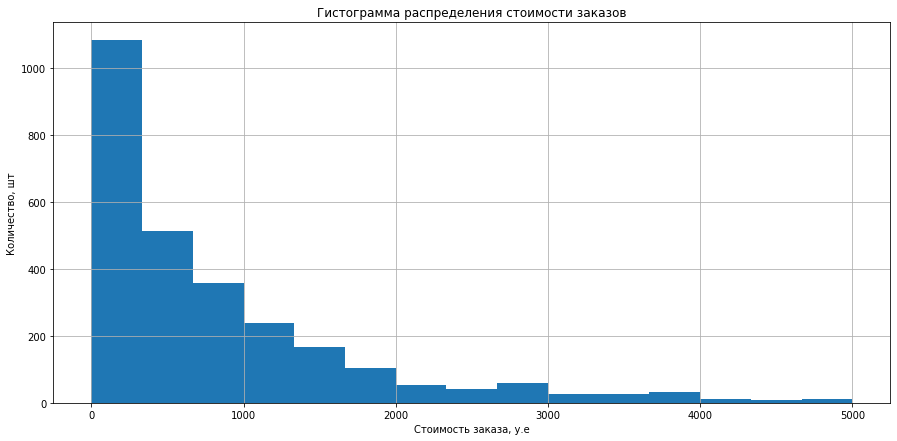

In [13]:
# Построим гистограмму для столбца'price' на основе данных о покупателях:
users_data.hist('price',bins=15,range=(0,5000), figsize=(15, 7), grid=True,)
plt.title('Гистограмма распределения стоимости заказов')
plt.xlabel('Стоимость заказа, у.е')
plt.ylabel('Количество, шт')
plt.show()

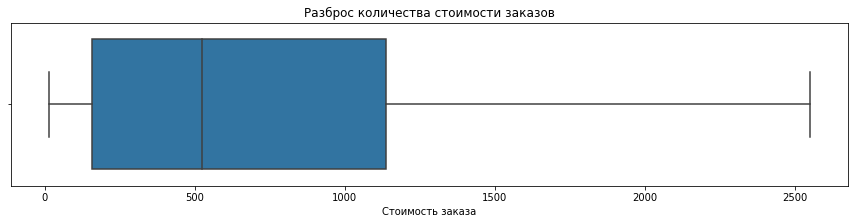

In [14]:
# Построим график разброса для столбца 'price'на основе данных о покупателях:
plt.figure(figsize=(15, 3))
sns.boxplot(data=users_data,x='price',showfliers=False)
plt.title('Разброс количества стоимости заказов')
plt.xlabel('Стоимость заказа')
plt.show()

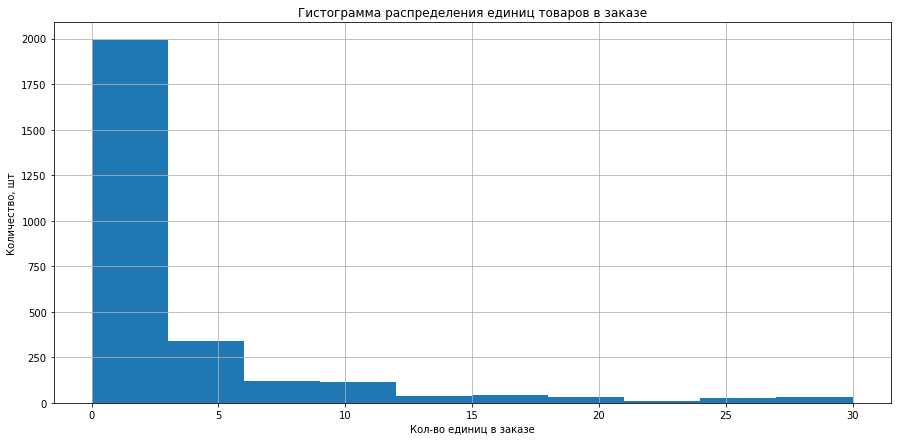

In [15]:
# Построим гистограмму для столбца'quantity'на основе данных о покупателях:
users_data.hist('quantity',bins=10,range=(0,30), figsize=(15, 7), grid=True)
plt.title('Гистограмма распределения единиц товаров в заказе')
plt.xlabel('Кол-во единиц в заказе')
plt.ylabel('Количество, шт')
plt.show()

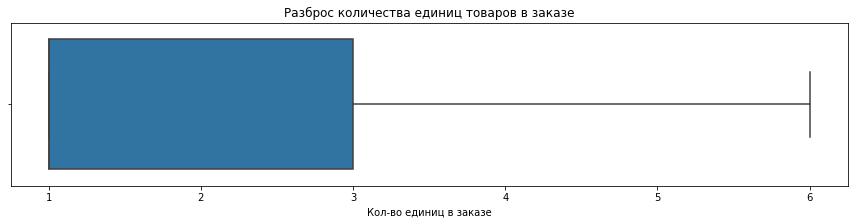

In [16]:
# Построим график разброса для столбца 'quantity'на основе данных о покупателях:
plt.figure(figsize=(15, 3))
sns.boxplot(data=users_data,x='quantity',showfliers=False)
plt.title('Разброс количества единиц товаров в заказе')
plt.xlabel('Кол-во единиц в заказе')
plt.show()

In [17]:
# Найдем уникальных покупателей:
print('Всего уникальных покупателей в DF - {} чел.'.format(data['customer_id'].nunique()))
print('Всего покупателей в DF, которые берут на сумму более 2500  - {} чел.'.format(len(users_data.query('price >2500'))))
print('Всего покупателей в DF, которые берут более 6 ед.товаров - {} чел.'.format(len(users_data.query('quantity >6'))))

Всего уникальных покупателей в DF - 2451 чел.
Всего покупателей в DF, которые берут на сумму более 2500  - 283 чел.
Всего покупателей в DF, которые берут более 6 ед.товаров - 435 чел.


In [18]:
# Избавимся от выбросов:
data = data.query('price <2500 and quantity <6 ')

**Выводы:**
* Медина по стоимости заказа 524 у.е, Q1= 157 ,Q3= 1139, все что больше 2500 можно считать выбросами;
* Медина по количеству единиц в заказе 1, Q1= 1 ,Q3= 3, все что больше 6 можно считать выбросами;
* Всего уникальных покупателей в DF - 2451 чел.;
* Всего покупателей в DF, которые берут на сумму более 2500  - 283 чел.;
* Всего покупателей в DF, которые берут более 6 ед.товаров - 435 чел.;
* После удаления выбросов потеряли 629 строк, что составляет 9,3% от начального DF.

In [19]:
data.groupby(['customer_id', 'order_id', 'product']).count().sort_values('date', ascending=False).head()

date  \
customer_id                          order_id product                                                    
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    рассада огурца сорт каролина кассета 6 шт e6          74   
                                              рассада огурец фараон ячейки по 6 шт е6               74   
                                              рассада патиссона сорт диск, кассета по 6шт           74   
                                              рассада патиссона сорт нло белый, кассета по 6шт      74   
                                              тагетис крупноцветковый рассада однолетних цвет...    74   

                                                                                                  quantity  \
customer_id                          order_id product                                                        
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    рассада огурца сорт каролина кассета 6 шт e6              74   
                                              рассада огурец фараон ячейки по 6 шт е6                   74   
                                              рассада патиссона сорт диск, кассета по 6шт               74   
                                              рассада патиссона сорт нло белый, кассета по 6шт          74   
                                              тагетис крупноцветковый рассада однолетних цвет...        74   

                                                                                                  price  \
customer_id                          order_id product                                                     
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    рассада огурца сорт каролина кассета 6 шт e6           74   
                                              рассада огурец фараон ячейки по 6 шт е6                74   
                                              рассада патиссона сорт диск, кассета по 6шт            74   
                                              рассада патиссона сорт нло белый, кассета по 6шт       74   
                                              тагетис крупноцветковый рассада однолетних цвет...     74   

                                                                                                  day_of_week  \
customer_id                          order_id product                                                           
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    рассада огурца сорт каролина кассета 6 шт e6                 74   
                                              рассада огурец фараон ячейки по 6 шт е6                      74   
                                              рассада патиссона сорт диск, кассета по 6шт                  74   
                                              рассада патиссона сорт нло белый, кассета по 6шт             74   
                                              тагетис крупноцветковый рассада однолетних цвет...           74   

                                                                                                  month_year  \
customer_id                          order_id product                                                          
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    рассада огурца сорт каролина кассета 6 шт e6                74   
                                              рассада огурец фараон ячейки по 6 шт е6                     74   
                                              рассада патиссона сорт диск, кассета по 6шт                 74   
                                              рассада патиссона сорт нло белый, кассета по 6шт            74   
                                              тагетис крупноцветковый рассада однолетних цвет...          74   

                                                                                                  year  \
customer_id                          order_id product                                                    
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833   

In [20]:
# Удалим дубликаты все кроме первого, которые являются отслеживающим статусом заказа (создан, оплачен, доставлен и тд.):
data=data.sort_values('date').drop_duplicates(subset=['customer_id', 'order_id', 'product'], keep='first')

In [21]:
# Проведем лемматизацию с помощью библоиотеки  pymystem3:
from pymystem3 import Mystem

m = Mystem()


text = ''.join(data['product'])
lemmas = m.lemmatize(text)

from collections  import Counter
Counter(lemmas)

Counter({'комнатный': 20,
         ' ': 27592,
         'растение': 78,
         'в': 510,
         'горшок': 269,
         'алый': 6,
         'вера': 6,
         ', ': 1612,
         'd12': 133,
         'h30стеклянная': 1,
         'крышка': 53,
         'для': 940,
         'сковорода': 4,
         'alpenkok': 13,
         '26': 8,
         'см': 1297,
         'ak': 13,
         '-': 1678,
         '26glсковорода': 1,
         'алюминиевый': 29,
         'с': 343,
         'антипригарный': 10,
         'покрытие': 27,
         'marble': 2,
         'd': 439,
         ' = ': 4,
         '0039a': 1,
         '/': 169,
         '26nмини': 1,
         'marmiton': 2,
         ' "': 32,
         'сердце': 7,
         '" ': 31,
         '12': 427,
         'lg17085корзина': 1,
         'мягкий': 6,
         'пластиковый': 55,
         '17': 23,
         'л': 151,
         'м': 90,
         'пластика': 6,
         'm2880чехол': 1,
         'eurogold': 19,
         'clean': 9,
         'ba

In [22]:
# Создадим новый столбец для каждого товара с помощью метода apply и наших лемматизированных строк :
data['lem_product'] = data['product'].apply(m.lemmatize)

In [23]:
# Проверим результат:
data.sample(n=10)

,date,customer_id,order_id,product,quantity,price,day_of_week,month_year,year,week,lem_product
1920,2019-02-20,384c1e4b-ac85-44bf-8968-4377d626e983,70366,бальзамин новогвинейский d-13 см ярко красный,1,134.0,2019-02-14,2019-02-01,2019,8,"[бальзамин, , новогвинейский, , d, -, 13, ,..."
3122,2019-04-24,2a0acc09-e343-4f92-b5c0-f598ef2b07d4,14688,томата (помидор) ильди №35 сорт детерминантный...,3,38.0,2019-04-18,2019-04-01,2019,17,"[томат, (, помидор, ) , ильди, , №, 35, , с..."
6387,2019-09-21,6718a7fc-75c2-4b8a-820d-b2960be23ca7,14932,салат рукола сицилия 1 г 4660010772852,1,14.0,2019-09-19,2019-09-01,2019,38,"[салат, , рукол, , сицилия, , 1, , г, , 4..."
4185,2019-05-31,db77c238-3c80-4032-9e3c-c30a43f4a650,14835,бакопа ампельная махровая фиолетовая махровая ...,1,90.0,2019-05-30,2019-05-01,2019,22,"[бакоп, , ампельный, , махровый, , фиолетов..."
3798,2019-05-15,3976660e-6cca-4009-a170-be13f13ed459,14778,арбуз волгоградец р-9,1,38.0,2019-05-09,2019-05-01,2019,20,"[арбуз, , волгоградец, , р, -, 9, \n]"
3730,2019-05-13,18a149fe-1d58-4153-98d1-acf7c2953872,14766,петуния махровая рассада однолетних цветов в г...,1,142.0,2019-05-09,2019-05-01,2019,20,"[петуния, , махровый, , рассада, , однолетн..."
6061,2019-08-06,8b2b91ad-735a-40c3-ab0f-2e731b449090,72225,штора для ванной комнаты cannetto 240х200 см к...,1,1199.0,2019-08-01,2019-08-01,2019,32,"[штора, , для, , ванный, , комната, , cann..."
2112,2019-03-01,dff446b4-5e50-4bbc-90e1-e8da30e35aac,70534,подарочный набор на 8 марта пеларгония красная...,2,194.0,2019-02-28,2019-03-01,2019,9,"[подарочный, , набор, , на, , 8, , март, ..."
228,2018-10-12,7171c6a6-9126-4cff-ac95-948db08f492d,68621,герань домашняя (пеларгония зональная) цветуща...,1,149.0,2018-10-11,2018-10-01,2018,41,"[герань, , домашний, (, пеларгония, , зонал..."
75,2018-10-04,e64aad3a-fffc-4193-8df5-e94a43eff295,68521,"ёрш унитазный с подставкой wc ""стандарт"", муль...",1,67.0,2018-10-04,2018-10-01,2018,40,"[ерш, , унитазный, , с, , подставка, , wc,..."


In [24]:
# Создадим словарь для выделения категорий с ключевыми словами,которые относятся к данным категориям:
classification_dict = {
    'хозтовары для дома': ['термометр', 'сушилка',  'гладильная', 'гладильный', 'таз', 'искусственный',
                 'прищепка', 'муляж', 'сиденье', 'шнур', 'чехол', 'крышка', 'вешалка', 'крючок', 'корзина',
                 'полка', 'щетка', 'ерш', 'прищепок', 'прищепки', 'дозатор', 'шпингалет', 'мусорный', 'урна', 'перчатка', 'швабра',
                 'салфетка', 'ведро', 'плечики', 'мусор', 'кофр', 'светильник', 'мыло', 'пена','комплект','крем','ника','паста','контейнер','зубной',
                 'коробка','ящик','веник','совок','тряпка','ножеточка','пакет','ванный','комната','виолета','банка','корыто','рыбочистка','сидение',
                'соковарка','овощеварка','утюг','соковыжималка','терка'],
    'сумки': ['сумка','тележка'],
    'рассада и семена': ['рассада','сорт','семена','г'],

    'растения': ['пеларгония', 'петуния', 'калибрахоа', 'бакопа', 'радермахер', 'растение', 'хризолидокарпус', 'циперус', 'литопс', 'мимоза',
                'патиссон', 'герань', 'роза', 'шеффлер', 'юкка', 'эвкалипт', 'фиалка', 'каланхое', 'эхеверие', 'мирт', 'мединилла'
                'лавр', 'суккулент', 'адиантум', 'тимьян', 'хлорофитум', 'душица', 'кампанула', 'калатея', 'кампатунь', 'нолина',
                'цикламен', 'нолина', 'мята', 'кампануть', 'глоксиния', 'азалия', 'гортензия', 'хризантема', 'эхинокактус',
                'зверобой', 'фуксия', 'пуантесия', 'кориандр', 'иссоп', 'сантолина', 'аспарагус', 'пуансеттия', 'пахира','лавр','d','h','афеляндра','диам'], 
    'текстиль': ['коврик', 'белье', 'штора', 'полотенце', 'плед', 'скатерть', 'ковер', 'простыня','простынь', 'подушка', 'одеяло','ткань','наматрасник','халат','покрывало'],
    'стройтельные товары': ['лестница', 'стремянка', 'стяжка', 'пробка', 'крепеж', 'пружина', 'петля', 'сварка', 'сверло','сверел','набор','стеллаж','карниз','уголок',
                            'оконный','решетка','угольник','ручка','линейка'],
    'посуда для кухни': ['luminarc', 'сковорода', 'вилка', 'ложка', 'нож', 'кастрюля', 'толкушка', 'стакан', 'противень', 'салатник',
              'мука', 'кухня', 'термокружка', 'tepмокружка', 'посуда', 'термокружок',  'сахарница','тарелка','подставка','половник','кружка','блюдо','чайник','миксер','кипятильник'], 
}

In [25]:
# Проведем классификацию product по категориям с помощью словаря:
def classify(lem_product):
    for category, items_list in classification_dict.items():
        for item in items_list:
            if item in lem_product:
                return category
    return 'прочее'

In [26]:
# Примением функцию к DF для создания нового столбца и выведем сколько товаров получилось в каждой из категорий: 
data['product_type'] = data['lem_product'].apply(classify)
data['product_type'].value_counts()

растения               1446
хозтовары для дома     1130
рассада и семена        792
прочее                  321
сумки                   242
текстиль                158
посуда для кухни        151
стройтельные товары      85
Name: product_type, dtype: int64

In [27]:
# Сгруппируем DF по категориям и выведем:
# 1.Количество уникальных покупателей unique_buyers;
# 2.Общее количество проданных товаров в категории total_sold;
# 3. Количество заказов total_order;
# 4. Количество уникальных товарных позиций unique_product;
# 5. Среднию цену товарных позиций в категории avg_price.
product_type_data=(data.groupby('product_type')
      .agg({'customer_id':'nunique','quantity':'sum', 'order_id':'count','product':'nunique','price':'mean'})
      .rename(columns = {'customer_id':'unique_buyers','quantity':'total_sold','order_id':'total_order','product':'unique_product','price':'avg_price'})
      .round(2)
    )
display(product_type_data)

,unique_buyers,total_sold,total_order,unique_product,avg_price
product_type,,,,,
посуда для кухни,116,229,151,120,394.05
прочее,156,425,321,217,235.74
рассада и семена,141,1102,792,347,103.85
растения,570,1749,1446,451,177.90
стройтельные товары,73,110,85,76,851.22
сумки,217,246,242,53,1022.47
текстиль,132,213,158,124,830.94
хозтовары для дома,858,1521,1130,665,585.30


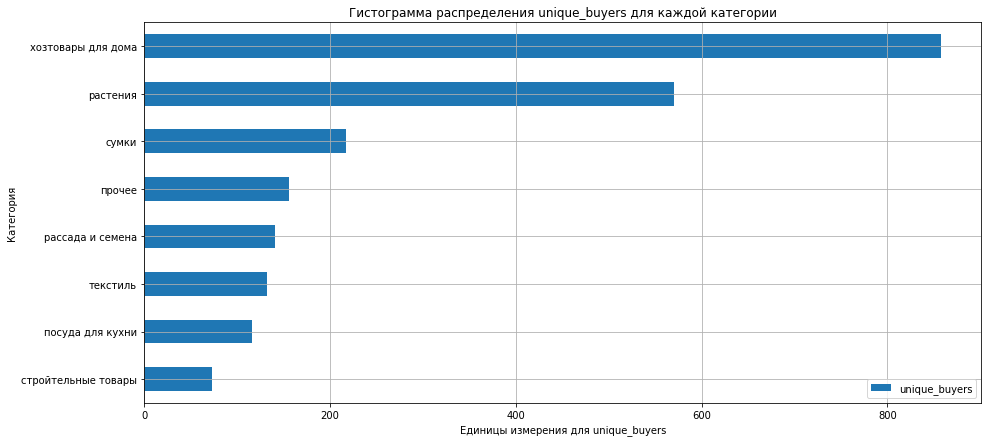

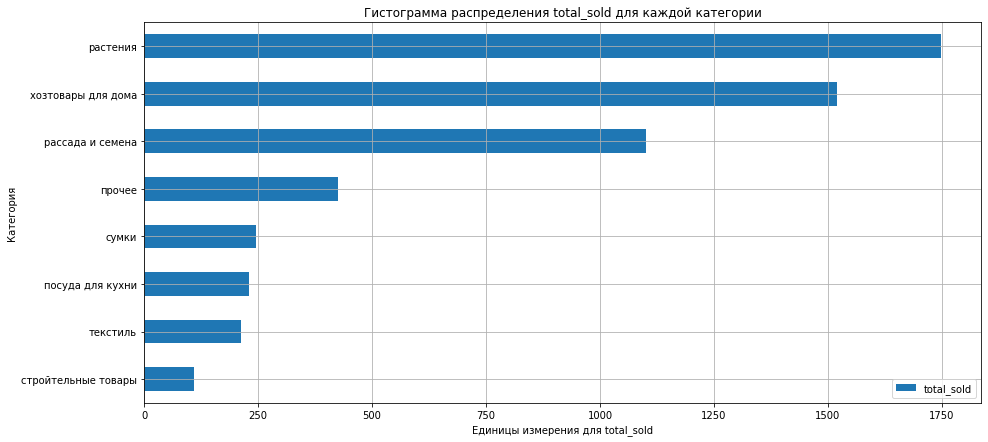

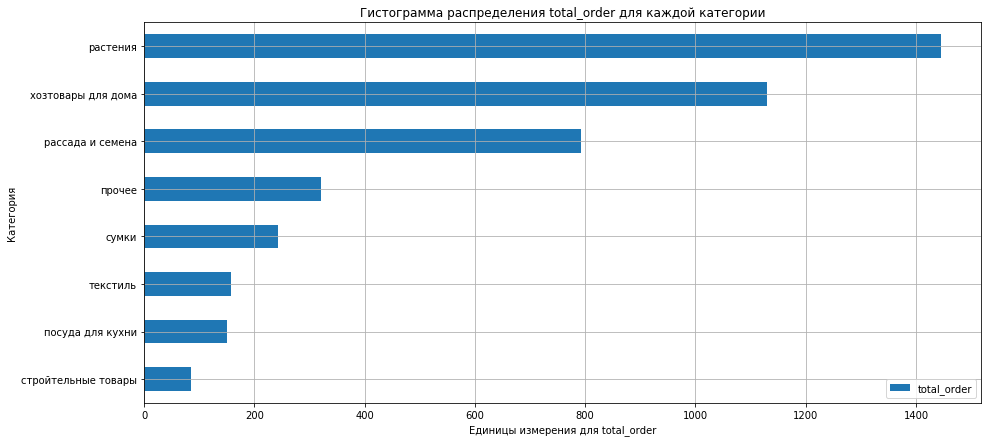

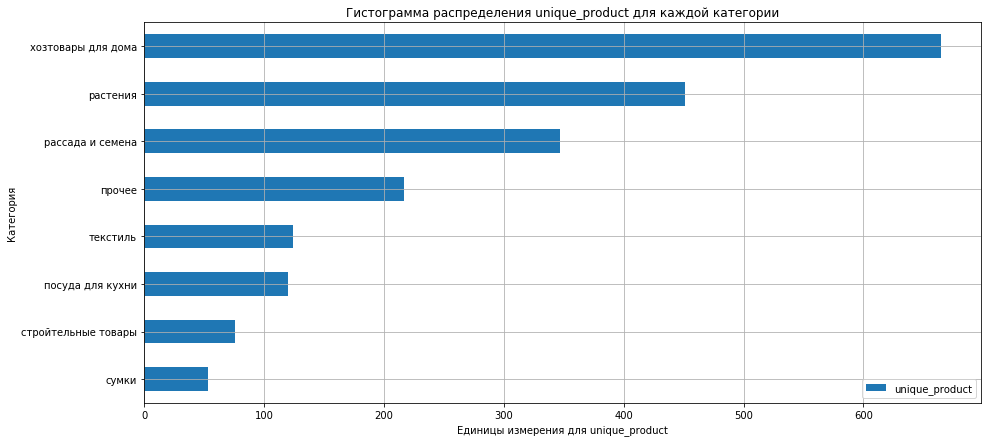

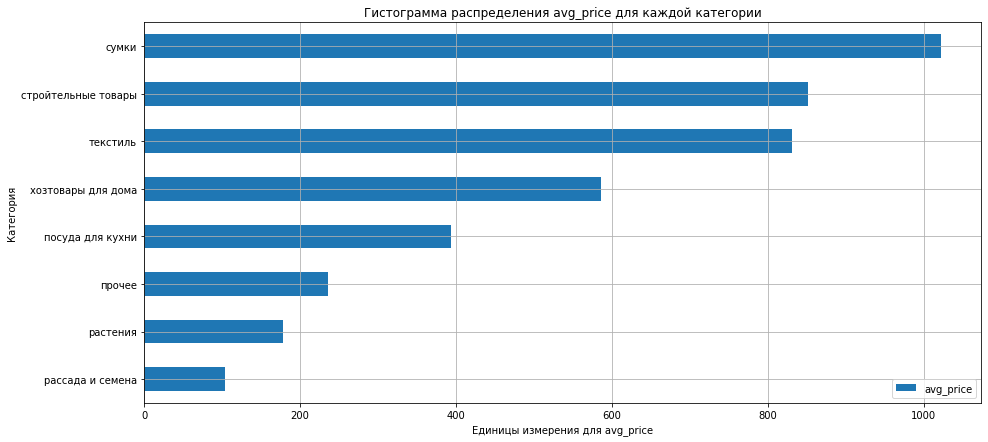

In [28]:
# Построим гистограммы по полученному DF категорий:
for group in product_type_data.columns:
    product_type_data.sort_values(by=group).plot(kind='barh', y=group,figsize=(15, 7), grid=True)
    plt.title('Гистограмма распределения {} для каждой категории'.format(group))
    plt.xlabel('Единицы измерения для {}'.format(group))
    plt.ylabel('Категория')
    plt.show()

**Выводы:**
* ТОП3 по количеству уникальных покупателей (unique_buyers): хозтовары для дома - 858, растения - 570 и сумки - 217;
* Хуже всего по количеству уникальных покупателей (unique_buyers):стройтельные товары - 73;


* ТОП3 по общему количеству проданных товаров (total_sold): рассада и семена - 2149, растения - 2067 и  хозтовары для дома - 1797;
* Хуже всего по общему количеству проданных товаров (total_sold): стройтельные товары - 131;


* ТОП3 по количеству заказов (total_order): рассада и семена - 1815, растения - 1717 и  хозтовары для дома - 1337;
* Хуже всего по количеству заказов (total_order): стройтельные товары - 102;


* ТОП3 по количеству уникальных товарных позиций (unique_product): хозтовары для дома - 665, растения - 451  и рассада и семена - 347;
* Хуже всего по количеству уникальных товарных позиций (unique_product): сумки - 53;


* ТОП3 по средней цене товарных позиций (avg_price): сумки - 1033.92, строительные товары - 922.81 и  текстиль - 806.33;
* Хуже всего по средней цене товарных позиций (avg_price):рассада и семена - 117,01.

In [29]:
# Для каждой категории выведем опистаельную статистику данных:
data[['price','product_type']].groupby(['product_type']).describe().T

product_type  посуда для кухни       прочее  рассада и семена     растения  \
price count         151.000000   321.000000        792.000000  1446.000000   
      mean          394.052980   235.744548        103.847222   177.902490   
      std           464.128672   369.556952         71.316627   189.378925   
      min            19.000000    11.000000          9.000000    14.000000   
      25%           104.000000    82.000000         38.000000   112.000000   
      50%           202.000000    98.000000        120.000000   142.000000   
      75%           479.000000   187.000000        128.000000   187.000000   
      max          2399.000000  2249.000000        749.000000  2219.000000   

product_type  стройтельные товары        сумки     текстиль  \
price count             85.000000   242.000000   158.000000   
      mean             851.223529  1022.466942   830.943038   
      std              676.321341   408.954361   597.630217   
      min               22.000000   150.000000    74.000000   
      25%              194.000000   734.000000   278.750000   
      50%              802.000000  1049.000000   749.000000   
      75%             1499.000000  1087.000000  1189.750000   
      max             1987.000000  2025.000000  2249.000000   

product_type  хозтовары для дома  
price count          1130.000000  
      mean            585.296460  
      std             566.537356  
      min              15.000000  
      25%             142.000000  
      50%             449.000000  
      75%             787.000000  
      max            2474.000000

In [30]:
# Создадим функцию для разделения товарных позиций на основные или дополнительные товары.
# Деление происходит за счет сравнения цены товара с медиано цены в данной категории.
def base_or_additional(row):
    if 'посуда для кухни'  in row['product_type'] and row['price'] < 187:
        return 'дополнительный товар'
    elif 'прочее'  in row['product_type'] and row['price'] < 97:
        return 'дополнительный товар'
    elif 'рассада и семена'  in row['product_type'] and row['price'] < 120:
        return 'дополнительный товар'
    elif 'растения'  in row['product_type'] and row['price'] < 135:
        return 'дополнительный товар'
    elif 'стройтельные товары'  in row['product_type'] and row['price'] < 993:
        return 'дополнительный товар'
    elif 'сумки'  in row['product_type'] and row['price'] < 1087:
        return 'дополнительный товар'
    elif 'текстиль'  in row['product_type'] and row['price'] < 693:
        return 'дополнительный товар'
    elif 'хозтовары для дома'  in row['product_type'] and row['price'] < 389:
        return 'дополнительный товар'
    else: 
        return 'основной товар'

In [31]:
#Создадим дополнительный столбец в DF с указанием основной или дополнительный товар,методом apply:
data['type'] = data.apply(base_or_additional, axis=1)

In [32]:
# Проверим результаты:
display(data.head())

,date,customer_id,order_id,product,quantity,price,day_of_week,month_year,year,week,lem_product,product_type,type
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-09-27,2018-10-01,2018,40,"[комнатный, , растение, , в, , горшок, , а...",растения,основной товар
17,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,стеклянная крышка для сковороды alpenkok 26 см...,1,262.0,2018-09-27,2018-10-01,2018,40,"[стеклянный, , крышка, , для, , сковорода, ...",хозтовары для дома,дополнительный товар
16,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,сковорода алюминиевая с антипригарным покрытие...,1,824.0,2018-09-27,2018-10-01,2018,40,"[сковорода, , алюминиевый, , с, , антиприга...",растения,основной товар
15,2018-10-01,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"мини-сковорода marmiton ""сердце"" с антипригарн...",1,239.0,2018-09-27,2018-10-01,2018,40,"[мини, -, сковорода, , marmiton, "", сердце, ...",посуда для кухни,основной товар
14,2018-10-01,a576fa59-7b28-4a4c-a496-92f128754a94,68487,"корзина мягкая пластиковая 17 л, м-пластика, m...",1,188.0,2018-09-27,2018-10-01,2018,40,"[корзина, , мягкий, , пластиковый, , 17, ,...",хозтовары для дома,дополнительный товар


In [33]:
# Сгруппируем DF по категориям и по типу товара(основной или дополнительный) и выведем:
# 1.Количество уникальных покупателей unique_buyers;
# 2.Общее количество проданных товаров в категории total_sold;
# 3. Количество заказов total_order;
# 4. Количество уникальных товарных позиций unique_product;
# 5. Среднию цену товарных позиций в категории avg_price.
(data.groupby(['product_type','type'])
      .agg({'customer_id':'nunique','quantity':'sum', 'order_id':'count','product':'nunique','price':'mean'})
      .rename(columns = {'customer_id':'unique_buyers','quantity':'total_sold','order_id':'total_order','product':'unique_product','price':'avg_price'})
      .round(2)
    )

unique_buyers  total_sold  \
product_type        type                                              
посуда для кухни    дополнительный товар             44         108   
                    основной товар                   78         121   
прочее              дополнительный товар             56         187   
                    основной товар                  116         238   
рассада и семена    дополнительный товар             84         613   
                    основной товар                  105         489   
растения            дополнительный товар            280         670   
                    основной товар                  360        1079   
стройтельные товары дополнительный товар             40          72   
                    основной товар                   34          38   
сумки               дополнительный товар            122         133   
                    основной товар                  101         113   
текстиль            дополнительный товар             64         107   
                    основной товар                   71         106   
хозтовары для дома  дополнительный товар            362         827   
                    основной товар                  517         694   

                                          total_order  unique_product  \
product_type        type                                                
посуда для кухни    дополнительный товар           62              56   
                    основной товар                 89              65   
прочее              дополнительный товар          134              79   
                    основной товар                187             142   
рассада и семена    дополнительный товар          387             190   
                    основной товар                405             177   
растения            дополнительный товар          524             182   
                    основной товар                922             281   
стройтельные товары дополнительный товар           49              47   
                    основной товар                 36              29   
сумки               дополнительный товар          130              28   
                    основной товар                112              29   
текстиль            дополнительный товар           73              53   
                    основной товар                 85              72   
хозтовары для дома  дополнительный товар          513             321   
                    основной товар                617             351   

                                          avg_price  
product_type        type                             
посуда для кухни    дополнительный товар      96.11  
                    основной товар           601.61  
прочее              дополнительный товар      66.46  
                    основной товар           357.05  
рассада и семена    дополнительный товар      52.49  
                    основной товар           152.92  
растения            дополнительный товар      94.52  
                    основной товар           225.29  
стройтельные товары дополнительный товар     339.24  
                    основной товар          1548.08  
сумки               дополнительный товар     736.65  
                    основной товар          1354.22  
текстиль            дополнительный товар     315.58  
                    основной товар          1273.55  
хозтовары для дома  дополнительный товар     139.38  
                    основной товар           956.05

In [34]:
# Выведем таблицу с продуктами (случайные 10 значений), которые относятся к Основному типу:
display(data[['product','product_type','type']].query('type == "основной товар"').sample(n=10))

,product,product_type,type
444,герань домашняя (пеларгония зональная) цветуща...,растения,основной товар
1183,кипарисовик лавсона элвуди ртк 106 горшок 9 л ...,прочее,основной товар
4093,пеларгония зональная диам. 12 см белая махровая,растения,основной товар
2944,табак душистый рассада однолетних цветов в кас...,рассада и семена,основной товар
4002,петуния простая рассада однолетних цветов в ка...,рассада и семена,основной товар
1638,подставка для ножей alpenkok круглая из пласти...,посуда для кухни,основной товар
601,пеларгония розоцветная ред розебуд молодые рас...,растения,основной товар
6121,коврик придверный mohawk mansonry foliage лист...,текстиль,основной товар
2856,гладильная доска ника гранд 122х42 см нг,хозтовары для дома,основной товар
6139,паста зубная для профилактики заболеваний десе...,хозтовары для дома,основной товар


In [35]:
# Если необходимо, здесь можно получить список основных товаров:
additional_product= data[data['type'] == 'основной товар']['product'].tolist()
display(additional_product)

['комнатное растение в горшке алое вера, d12, h30',
 'сковорода алюминиевая с антипригарным покрытием marble alpenkok d = 26 см ak-0039a/26n',
 'мини-сковорода marmiton "сердце" с антипригарным покрытием 12 см, lg17085',
 'сушилка для белья потолочная zalger lift basic 1520 200 см, 10 м',
 'чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379',
 'сушилка для белья напольная colombo star 18, 3679',
 'настенная сушилка для белья gimi brio super 100',
 'шеффлера лузеана d-9 см',
 'хризолидокарпус лутесценс d-9 см',
 'комнатное растение в горшке кофе арабика, d12, h25',
 'вилка столовая ripple сталь 3 мм, 3 шт, attribute, acr013',
 'ложка столовая ripple сталь 3 мм, 3 шт, attribute, acr023',
 'пеларгония зональная диам. 12 см сиреневый простая',
 'пеларгония зональная диам. 12 см сиренево-красная простая',
 'пеларгония зональная диам. 12 см сиреневый полумахровый',
 'нож столовый ripple 80 г 2 шт, attribute, acr042',
 'пеларгония зональная диам. 12 см малиновая с красны

In [36]:
# Выведем таблицу с продуктами (случайные 10 значений), которые относятся к Дополнительному типу:
display(data[['product','product_type','type']].query('type == "дополнительный товар"').sample(n=10))

,product,product_type,type
1383,коврик придверный пористый из полимерных матер...,текстиль,дополнительный товар
200,хлорофитум d-13 см,растения,дополнительный товар
5729,коврик влаговпитывающий ребристый 60х90 см ста...,текстиль,дополнительный товар
1086,"эшшольция карминный король 0,5 г 4660010770193",рассада и семена,дополнительный товар
5683,рассада арбуза сорт шуга бэби горшок 9х9 см p-9,рассада и семена,дополнительный товар
1959,кофе арабика d-9 см,растения,дополнительный товар
2825,чехол для гладильной доски prisma textil из хл...,хозтовары для дома,дополнительный товар
2167,"тимьян овощной медок 0,1 г 4660010776423",рассада и семена,дополнительный товар
4115,рассада зелени для кухни тимьян-чабрец розовый...,рассада и семена,дополнительный товар
4010,мята перечная шоколадная chocolate d-7 см h-10...,растения,дополнительный товар


In [37]:
# Если необходимо, здесь можно получить список дополнительных товаров:
additional_product= data[data['type'] == 'дополнительный товар']['product'].tolist()
display(additional_product)

['стеклянная крышка для сковороды alpenkok 26 см ak-26gl',
 'корзина мягкая пластиковая 17 л, м-пластика, m2880',
 'чехол eurogold clean basic хлопок для досок 120х38-120х42 см c42',
 'юкка нитчатая d-12 см h-25-35 см',
 'циперус зумула d-12 см h-25 см',
 'радермахера d-12 см h-20 см',
 'таз пластмассовый 21,0 л круглый "водолей" с614, 1404056',
 'муляж персики мини полиуретан d-6 см',
 'муляж томат, оранжевый, 9 см, полиуретан, fancy fair/ff t9',
 'муляж черешня 3см 10 шт., желтый, fancy fair, scr30/10, желтый',
 'сумка для тележки большая комбинированная 45*30*25, 1209021',
 'ложка чайная ripple сталь 2,5 мм, 3 шт, attribute, acr033',
 'сушилка для белья настенная zalger prima 510-720 веревочная 7 линий 25 м',
 'суккулент микс d-5 см',
 'эхеверия перл фон нюрнберг d-7 см',
 'муляж перец, красный, 10 см, полиуретан, fancy fair/ff rp8',
 'муляж перец, зеленый, 10 см, полиуретан, fancy fair/ff gp8',
 'муляж лимон, желтый, 9 см, полиуретан, fancy fair/ff nm90',
 'сумка-тележка 2-х колесн

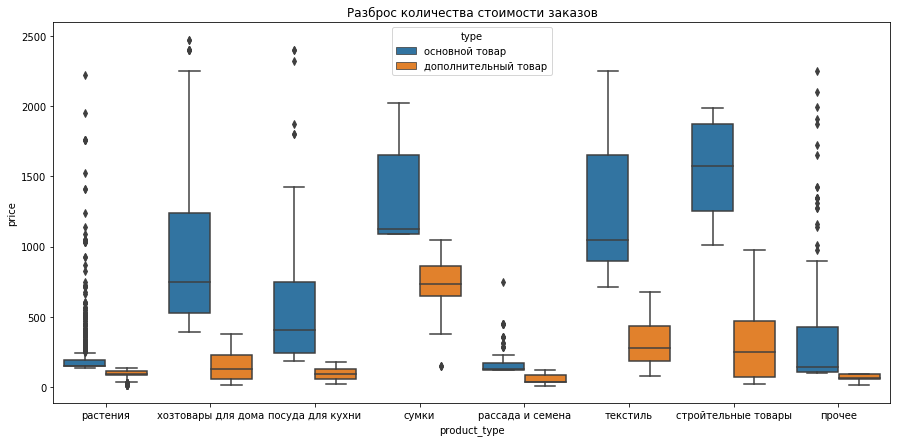

In [38]:
# Построим график разброса цены для каждой категории для основных и дополнитиельных товаров:
plt.figure(figsize=(15,7))
sns.boxplot(data=data, x= 'product_type', y='price', hue='type')
plt.title('Разброс количества стоимости заказов')
plt.show()

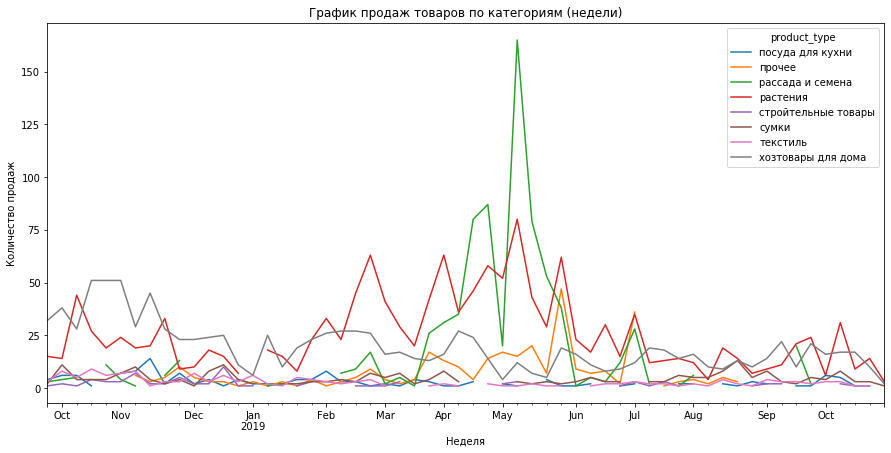

In [39]:
# Построим линейный график продаж по неделям для каждой категории:
(data.pivot_table(index='day_of_week', columns='product_type', values ='product', aggfunc='count')
 .plot(figsize=(15,7), title ='График продаж товаров по категориям (недели)')
)
plt.xlabel('Неделя')
plt.ylabel('Количество продаж')
plt.show()

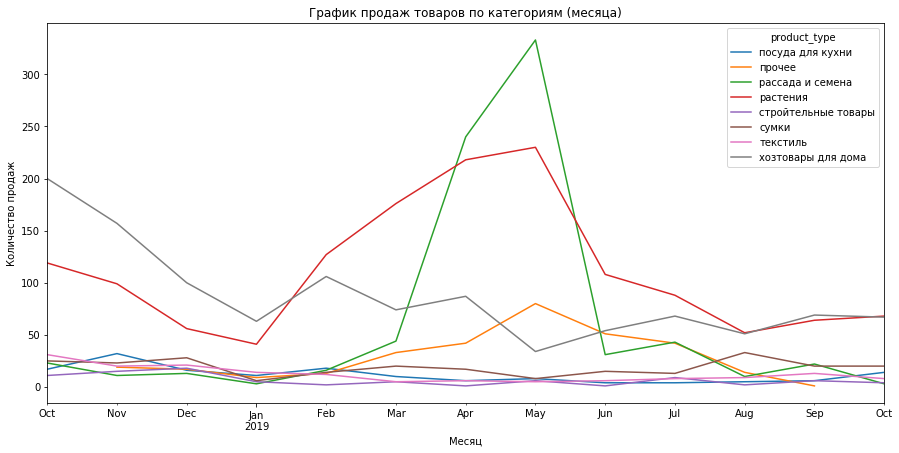

In [40]:
# Построим линейный график продаж по месяцам для каждой категории:
(data.pivot_table(index='month_year', columns='product_type', values ='product', aggfunc='count')
 .plot(figsize=(15,7), title ='График продаж товаров по категориям (месяца)')
)
plt.xlabel('Месяц')
plt.ylabel('Количество продаж')
plt.show()

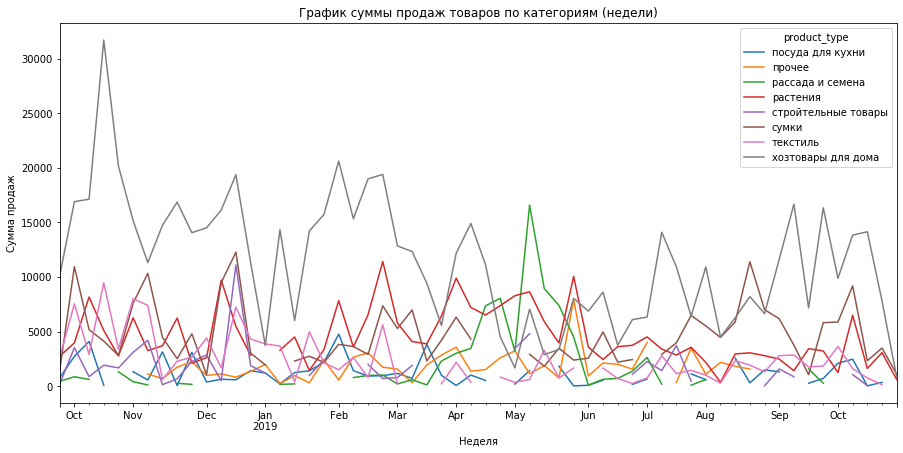

In [41]:
# Построим линейный график суммы продаж по неделям для каждой категории:
(data.pivot_table(index='day_of_week', columns='product_type', values ='price', aggfunc='sum')
 .plot(figsize=(15,7), title ='График суммы продаж товаров по категориям (недели)')
)
plt.xlabel('Неделя')
plt.ylabel('Сумма продаж')
plt.show()

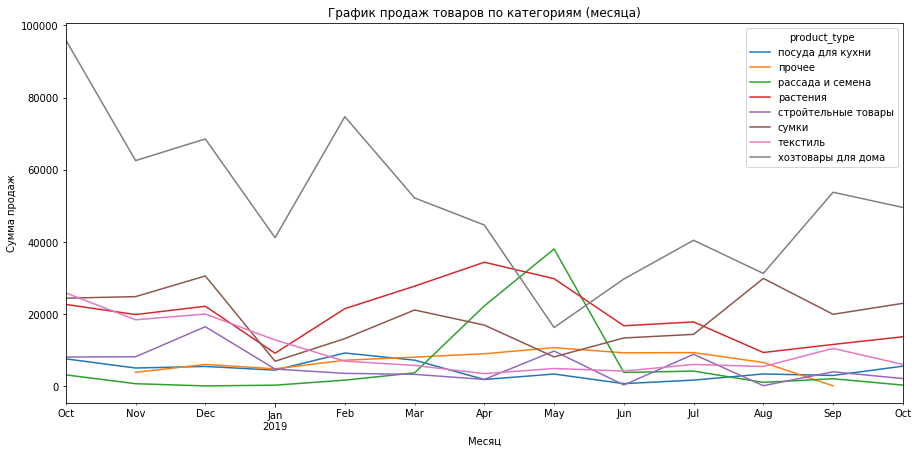

In [42]:
# Построим линейный график суммы продаж по месяцам для каждой категории:
(data.pivot_table(index='month_year', columns='product_type', values ='price', aggfunc='sum')
 .plot(figsize=(15,7), title ='График продаж товаров по категориям (месяца)')
)
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.show()

**Выводы:**
* Разделили товарные позиции в каждой категории на основные и дополнительные;
* Все категории кроме растения, рассада и семена равномерно создают одно количество заказов и сумму продаж в течение всего промежутка времени.

# Шаг 4. Проверим гипотезы<a id="4"></a>

**Гипотеза №1**

Сформулируем гипотезы:
* H0:Стоимость товаров в категориях **Растения** и **Текстиль** НЕ различаются
* H1:Стоимость товаров в категориях **Растения** и **Текстиль** различаются

In [43]:
# Найдем диспресию для двух выборок тестом Левена:
from scipy.stats import levene
a=data[data['product_type']== 'растения']['price']
b=data[data['product_type']== 'текстиль']['price']
stat, p = levene(a,b)
display(p)

1.8007363406708067e-110

In [44]:
# Найдем диспресию для двух выборок тестом Бартлетта: 
from scipy.stats import bartlett
stat, pp = bartlett(a, b)
display(pp)

8.530867041091237e-143

Малое значение p (при проверке тестом Левена и Бартлетта) говорит нам, что дисперсия для двух выборк не совпадает, значит при проверки нулевой гипотезы будем использовать st.ttest_ind аргумент equal_var=False т.к. он говорит методу что диспресия выборок не равны.

In [45]:
from scipy import stats as st
array1 = a
array2 = b

alpha = .05 

results = st.ttest_ind(array1,array2, equal_var=False)

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 1.1218626367326776e-28
Отвергаем нулевую гипотезу


**Вывод:**
    Полученное р-значение меньше порогового alpha, поэтому нулевая гипотеза была отвергнута.Стоимость товаров в категориях Растения и Текстиль различаются.

**Гипотеза №2**

Сформулируем гипотезы:
* H0:Стоимость дополнительных товаров в категориях **Посуда для кухни** и **Рассада и семена** НЕ различаются
* H1:Стоимость дополнительныех товаров в категориях **Посуда для кухни** и **Рассада и семена** различаются

In [46]:
# Найдем диспресию для двух выборок тестом Левена:
from scipy.stats import levene
a=data[(data['type'] == 'дополнительный товар') & (data['product_type']=='посуда для кухни')]['price']
b=data[(data['type'] == 'дополнительный товар') & (data['product_type']== 'рассада и семена')]['price']
stat, p = levene(a,b)
display(p)

1.0139742112312146e-05

In [47]:
# Найдем диспресию для двух выборок тестом Бартлетта: 
from scipy.stats import bartlett
stat, pp = bartlett(a, b)
display(pp)

3.582702055646754e-05

Малое значение p (при проверке тестом Левена и Бартлетта) говорит нам, что дисперсия для двух выборк не совпадает, значит при проверки нулевой гипотезы будем использовать st.ttest_ind аргумент equal_var=False т.к. он говорит методу что диспресия выборок не равны.

In [48]:

array1 = data[(data['type'] == 'дополнительный товар') & (data['product_type']=='посуда для кухни')]['price']

array2 = data[(data['type'] == 'дополнительный товар') & (data['product_type']== 'рассада и семена')]['price']


alpha = .05 

results = st.ttest_ind(array1,array2, equal_var=False)

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 9.755320437758305e-10
Отвергаем нулевую гипотезу


**Вывод:**
    Полученное р-значение меньше порогового alpha, поэтому нулевая гипотеза была отвергнута.Стоимость дополнительныех товаров в категориях Посуда для кухни и Рассада и семена различаются.

# 5.Выводы<a id="5"></a>

**1.** Цель проекта: определить какие товары входят в основной и в дополнительный ассортимент.


**2.** Исходные данные: Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».
Набор данных включает следующие поля:
- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

**3.** Исходные данные были достаточно чистыми, дополнительной обработки артефактов не понадобилось. Проверки проводились с целью выявить дубликаты и пропущенные значения. Привели только значения к нижнему регистру для  удобства дальнейшей обработки. Обнаружили в столбце `quantity` выбросы 1000, при медиане равной 1 и в столбце `price` выбросы 14917, при медиане 135.

**4.**
* С марта 2019 по июль 2019 резкий рост продаж, пик в июне 2019г (более 1600 продаж);
* В сентябре 2019  минимум продаж (около 300);
* В Ноябре 2019 (около 350) явный спад продаж по сравнению с ноябрем 2018г. (около 750);
* Медина по стоимости заказа 524 у.е, Q1= 157 ,Q3= 1139, все что больше 2500 можно считать выбросами;
* Медина по количеству единиц в заказе 1, Q1= 1 ,Q3= 3, все что больше 6 можно считать выбросами;
* Всего уникальных покупателей в DF - 2451 чел.;
* Всего покупателей в DF, которые берут на сумму более 2500  - 283 чел.;
* Всего покупателей в DF, которые берут более 6 ед.товаров - 435 чел.;
* После удаления выбросов потеряли 629 строк, что составляет 9,3% от начального DF;

**5.**
* ТОП3 по количеству уникальных покупателей (unique_buyers): хозтовары для дома - 858, растения - 570 и сумки - 217;
* Хуже всего по количеству уникальных покупателей (unique_buyers):стройтельные товары - 73;


* ТОП3 по общему количеству проданных товаров (total_sold): рассада и семена - 2149, растения - 2067 и  хозтовары для дома - 1797;
* Хуже всего по общему количеству проданных товаров (total_sold): стройтельные товары - 131;


* ТОП3 по количеству заказов (total_order): рассада и семена - 1815, растения - 1717 и  хозтовары для дома - 1337;
* Хуже всего по количеству заказов (total_order): стройтельные товары - 102;


* ТОП3 по количеству уникальных товарных позиций (unique_product): хозтовары для дома - 665, растения - 451  и рассада и семена - 347;
* Хуже всего по количеству уникальных товарных позиций (unique_product): сумки - 53;


* ТОП3 по средней цене товарных позиций (avg_price): сумки - 1033.92, строительные товары - 922.81 и  текстиль - 806.33;
* Хуже всего по средней цене товарных позиций (avg_price):рассада и семена - 117,01.

* Все категории кроме растения, рассада и семена равномерно создают одно количество заказов и сумму продаж в течение всего промежутка времени.

**6.**

* Разделили товарные позиции в каждой категории на основные и дополнительные;
* Деление происходит за счет сравнения цены товара с медианой цены в данной категории, если цена меньше медианы , то данный товар помечается как дополнительный, если больше медианы - основной.

**7.**
* Гипотеза №1.     Полученное р-значение меньше порогового alpha, поэтому нулевая гипотеза была отвергнута.Стоимость товаров в категориях Растения и Текстиль различаются.
* Гипотеза №2.     Полученное р-значение меньше порогового alpha, поэтому нулевая гипотеза была отвергнута.Стоимость дополнительныех товаров в категориях Посуда для кухни и Рассада и семена различаются.


**Рекомендации**
* Предлагать как сопутствующие товары (дополнительные товары) из одной категории к основным товарам;
* Во время роста количества заказов с марта по июль активно продвигать рекламные компании на категории растения, рассада и семена.

In [49]:
# Сохранием DF для построения дашборда Tableau:
data.to_csv('ecom', sep='\t', encoding='utf-8')